In [1]:
# importing the library

import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix , accuracy_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from collections import Counter


from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier

# Data Preprocessing 


In [2]:
# file reading using pandas

emp = pd.read_csv(r'D:\IMARTICUS\Level 2\employee_train.csv')

In [3]:
emp.shape

(1048, 28)

In [4]:
pd.set_option("display.max_columns",None)

In [5]:
emp.head(1)

,S.No,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,1,8/27/2014 11:29,37,Female,United States,IL,NaN,No,Yes,Often,25-Jun,No,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN


In [6]:
emp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048 entries, 0 to 1047
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   S.No                       1048 non-null   int64 
 1   Timestamp                  1048 non-null   object
 2   Age                        1048 non-null   int64 
 3   Gender                     1048 non-null   object
 4   Country                    1048 non-null   object
 5   state                      636 non-null    object
 6   self_employed              1030 non-null   object
 7   family_history             1048 non-null   object
 8   treatment                  1048 non-null   object
 9   work_interfere             812 non-null    object
 10  no_employees               1048 non-null   object
 11  remote_work                1048 non-null   object
 12  tech_company               1048 non-null   object
 13  benefits                   1035 non-null   object
 14  care_opt

In [7]:
emp= emp.drop(['S.No'], axis = 1)

In [8]:
emp.isnull().sum()[emp.isnull().sum()*100/ emp.shape[0] >5]

state             412
work_interfere    236
comments          916
dtype: int64

In [9]:
emp.isnull().sum()[emp.isnull().sum() >0]

state               412
self_employed        18
work_interfere      236
benefits             13
wellness_program      4
leave                 4
comments            916
dtype: int64

In [10]:
emp.care_options.value_counts()

No          422
Yes         363
Not sure    263
Name: care_options, dtype: int64

In [11]:
# convert them to 3 categories: Female, Male, Other

def convert_gender(Gender):
    Gender = Gender.strip().lower()

    if Gender in [ 'm', 'male', 'man', 'male-ish', 'maile', 'something kinda male?', 'cis male', 'mal', 'male (cis)', 
                  'make', 'msle', 'mail', 'cis male', 'malr', 'cis man']:
        return 'Male'

    elif Gender in ['female', 'cis female', 'f', 'woman', 'femake', 'cis-female/femme', 'female (cis)', 'femail']:
        return 'Female'
    
    else:
        return 'Other'
    
df = emp[['Gender']]
df_converted = df.applymap(convert_gender) # replace entries with Male/Female
emp['Gender'] = df_converted['Gender']

In [12]:
emp.Gender.value_counts()

Male      828
Female    202
Other      18
Name: Gender, dtype: int64

In [13]:
# convert negative age values into positive

emp['Age'] = emp['Age'].abs()

In [14]:
# only focus on adult groups, age 18 to 90

df2 = emp.loc[(emp['Age']>=18) & (emp['Age']<=90)]
emp_train = df2

In [15]:
emp.isnull().sum()[emp.isnull().sum() >0]

state               412
self_employed        18
work_interfere      236
benefits             13
wellness_program      4
leave                 4
comments            916
dtype: int64

In [16]:
emp.leave.value_counts()

Don't know            462
Somewhat easy         218
Very easy             176
Somewhat difficult    107
Very difficult         81
Name: leave, dtype: int64

In [17]:
emp['self_employed'].fillna("No", inplace=True) 
emp['work_interfere'].fillna('Unknown', inplace=True)
#the missing values in the "work_interfere" column are of particular interest. It's possible that individuals answered "NA" 
#because they don't believe they have health issues. I can create a new category called "Unknown" which implies that 
#the individual likely does not have mental health issues.
emp['benefits'].fillna("Don't know", inplace=True)
emp['wellness_program'].fillna("Don't know", inplace=True)
emp['leave'].fillna("Don't know", inplace=True)

In [18]:
emp.columns[emp.dtypes == 'object']

Index(['Timestamp', 'Gender', 'Country', 'state', 'self_employed',
       'family_history', 'treatment', 'work_interfere', 'no_employees',
       'remote_work', 'tech_company', 'benefits', 'care_options',
       'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'comments'],
      dtype='object')

In [19]:
emp.care_options.value_counts()

No          422
Yes         363
Not sure    263
Name: care_options, dtype: int64

# EDA

Male      828
Female    202
Other      18
Name: Gender, dtype: int64


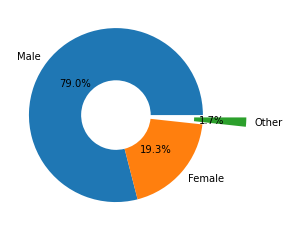

In [20]:
## Which gender was most effected

g=emp["Gender"].value_counts()
print(g)
color=sns.color_palette(palette='PRGn')
plt.pie(g,labels=g.index,autopct="%0.01f%%",textprops={"fontsize":10},wedgeprops={'width': 0.6},explode=[0,0,0.5]);


No     924
Yes    124
Name: self_employed, dtype: int64


Mostly Employee were working in offices and only 11% were self employed


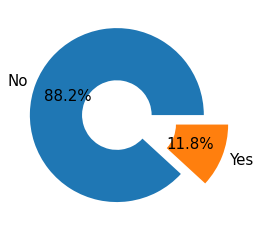

In [21]:
# How many employees were self employed 

s=emp["self_employed"].value_counts()
print(s)
color=sns.color_palette(palette='PRGn')
plt.pie(s,labels=s.index,autopct="%0.01f%%",textprops={"fontsize":15},wedgeprops={'width': 0.6},explode=[0,0.3]);
print('\n' )
print('Mostly Employee were working in offices and only 11% were self employed')

No     643
Yes    405
Name: family_history, dtype: int64


61% Employee have no family history of mental illness before


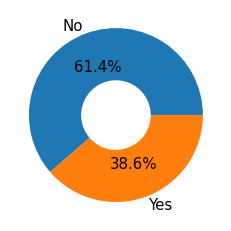

In [22]:
# how many employee have a family history of mental illness

f=emp["family_history"].value_counts()
print(f)
color=sns.color_palette(palette='PRGn')
plt.pie(f,labels=f.index,autopct="%0.01f%%",textprops={"fontsize":15},wedgeprops={'width': 0.6},explode=[0,0]);
print('\n' )
print('61% Employee have no family history of mental illness before')

No     536
Yes    512
Name: treatment, dtype: int64


51% of the employee were undergoing treatment for mental illness which is a huge number


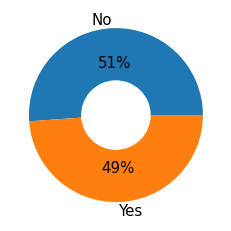

In [23]:
## How many employee were undergoing any treatment for mental illness

m=emp["treatment"].value_counts()
print(m)
color=sns.color_palette(palette='PRGn')
plt.pie(m,labels=m.index,autopct="%0.0f%%",textprops={"fontsize":15},wedgeprops={'width': 0.6},explode=[0,0]);
print('\n' )
print('51% of the employee were undergoing treatment for mental illness which is a huge number')

Sometimes    386
Unknown      236
Never        178
Rarely       144
Often        104
Name: work_interfere, dtype: int64


most of the employee says in their mental health condition,they feel that it interferes with their work


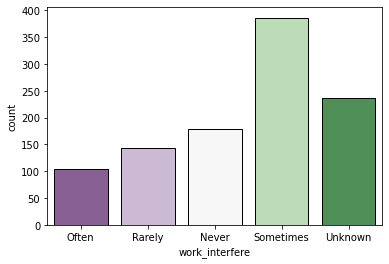

In [24]:
# If employee have a mental health condition, do they feel that it interferes with their work

print(emp["work_interfere"].value_counts())
sns.countplot(x="work_interfere",data=emp,edgecolor="black",palette='PRGn');
print('\n' )
print('most of the employee says in their mental health condition,they feel that it interferes with their work')

Yes    870
No     178
Name: tech_company, dtype: int64


most of the Employees were from the Tech Company


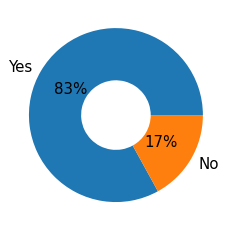

In [25]:
## How many employee were from the tech company 

tech=emp["tech_company"].value_counts()
print(tech)
color=sns.color_palette(palette='PRGn')
plt.pie(tech,labels=tech.index,autopct="%0.0f%%",textprops={"fontsize":15},wedgeprops={'width': 0.6},explode=[0,0]);
print('\n' )
print('most of the Employees were from the Tech Company')

Yes           400
Don't know    342
No            306
Name: benefits, dtype: int64


38% of the employee Get mental health benefits were as 33% don't know about it and 29% didn't get any benefits


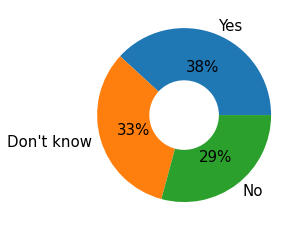

In [26]:
## Any employee who gets mental health benefits

b=emp["benefits"].value_counts()
print(b)
color=sns.color_palette(palette='PRGn')
plt.pie(b,labels=b.index,autopct="%0.0f%%",textprops={"fontsize":15},wedgeprops={'width': 0.6},explode=[0,0,0]);
print('\n' )
print("38% of the employee Get mental health benefits were as 33% don't know about it and 29% didn't get any benefits")

No          422
Yes         363
Not sure    263
Name: care_options, dtype: int64


250+ employee Not Sure about any care options being provided by their employer where as 350+ employee knows about that


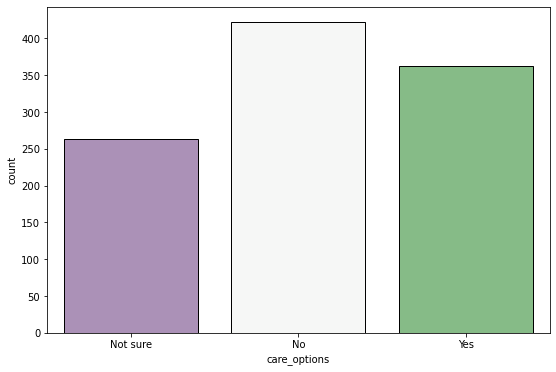

In [27]:
# How many employee know the options for mental health care their employer provides?

print(emp["care_options"].value_counts())
plt.figure(figsize=(9,6))
sns.countplot(x="care_options",data=emp,edgecolor="black",palette='PRGn');
print('\n' )
print("250+ employee Not Sure about any care options being provided by their employer where as 350+ employee knows about that")

Don't know            466
Somewhat easy         218
Very easy             176
Somewhat difficult    107
Very difficult         81
Name: leave, dtype: int64


Mostly Employee don't Know if it is easy to take medical leave for a mental health condition


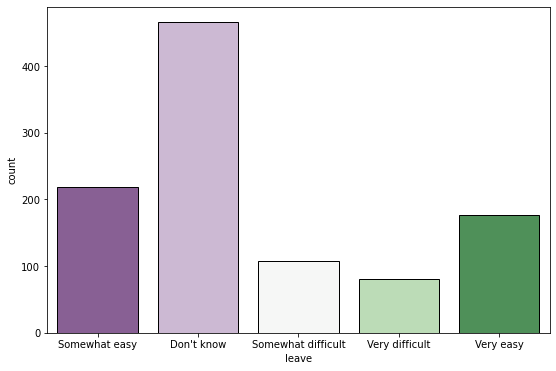

In [28]:
# How easy is it to take medical leave for a mental health condition

print(emp["leave"].value_counts())
plt.figure(figsize=(9,6))
sns.countplot(x="leave",data=emp,edgecolor="black",palette='PRGn');
print('\n' )
print("Mostly Employee don't Know if it is easy to take medical leave for a mental health condition")

<AxesSubplot:>

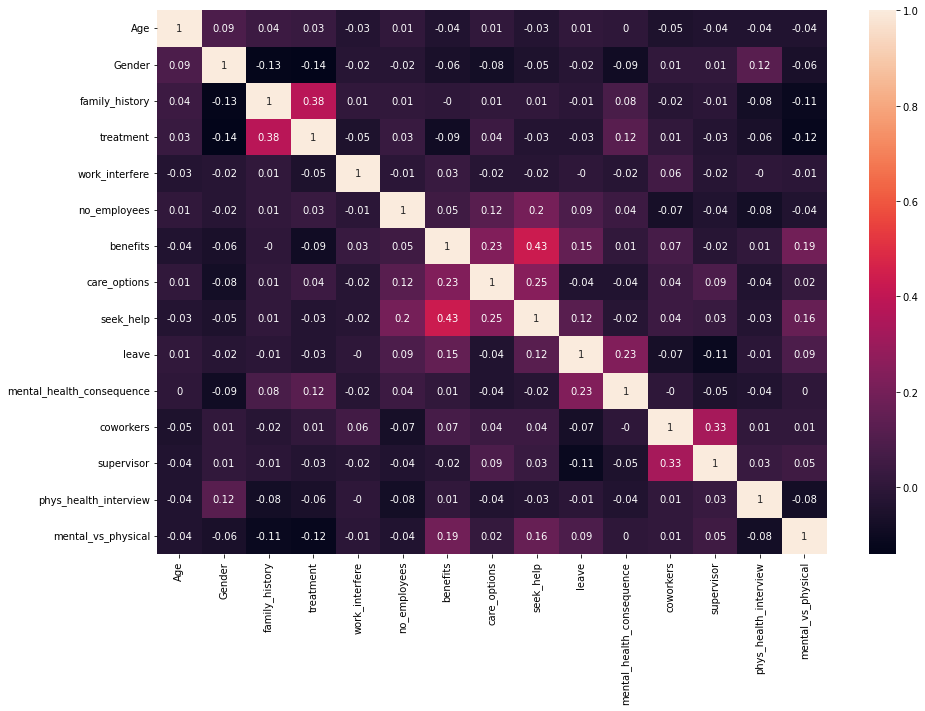

In [118]:
plt.figure(figsize = (15,10))
sns.heatmap(emp.corr().round(2), annot = True)

In [30]:
# converting non-numeric to numeric columns based on ordinal rank

emp.Gender.replace({"Female":0,"Male":1,"Other":2}, inplace = True)
emp.self_employed.replace({"No":0,"Yes":1}, inplace = True)
emp.family_history.replace({"No":0,"Yes":1}, inplace = True)
emp.treatment.replace({"No":0,"Yes":1}, inplace = True)
emp.remote_work.replace({"No":0,"Yes":1}, inplace = True)
emp.tech_company.replace({"No":0,"Yes":1}, inplace = True)
emp.benefits.replace({"No":0,"Yes":1,"Don't know" :2}, inplace = True)
emp.care_options.replace({"No":0,"Yes":1,"Not sure" :2}, inplace = True)
emp.wellness_program.replace({"No":0,"Yes":1,"Don't know" :2}, inplace = True)
emp.seek_help.replace({"No":0,"Yes":1,"Don't know" :2}, inplace = True)
emp.anonymity.replace({"No":0,"Yes":1,"Don't know" :2}, inplace = True)
emp.leave.replace({"Very easy":0,"Somewhat easy":1,"Somewhat difficult" :2, "Very difficult":3, "Don't know":4}, inplace = True)
emp.mental_health_consequence.replace({"No":0,"Yes":1,"Maybe" :2}, inplace = True)
emp.phys_health_consequence.replace({"No":0,"Yes":1,"Maybe" :2}, inplace = True)
emp.coworkers.replace({"No":0,"Yes":1,"Some of them" :2}, inplace = True)
emp.supervisor.replace({"No":0,"Yes":1,"Some of them" :2}, inplace = True)
emp.mental_health_interview.replace({"No":0,"Yes":1,"Maybe" :2}, inplace = True)
emp.phys_health_interview.replace({"No":0,"Yes":1,"Maybe" :2}, inplace = True)
emp.mental_vs_physical.replace({"No":0,"Yes":1,"Don't know" :2}, inplace = True)
emp.obs_consequence.replace({"No":0,"Yes":1}, inplace = True)

In [31]:
# having more than 50% null values and timestamp has no play important roll so i delete it.

emp= emp.drop(['Country','state','comments','Timestamp'], axis = 1)

In [32]:
emp.columns[emp.dtypes == 'object']

Index(['work_interfere', 'no_employees'], dtype='object')

In [33]:
#emp.care_options.value_counts()

In [34]:
le  = LabelEncoder()

emp[emp.select_dtypes(include = 'object').columns] = emp[emp.select_dtypes(include = 'object').columns].apply(le.fit_transform)

In [35]:
# cheking all object columns

emp.columns[emp.dtypes == 'object']

Index([], dtype='object')

In [36]:
# cheking the null values in dataset

emp.isnull().sum()[emp.isnull().sum() >0]

Series([], dtype: int64)

# Model Building

In [37]:
# Split the training dataset into features and target variable 

emp_X = emp.drop(['treatment'], axis = 1)
emp_Y = emp.treatment

# Standardization on train

In [107]:
scaler = StandardScaler()

emp_X = pd.DataFrame(scaler.fit_transform(emp_X), columns=emp_X.columns)

In [108]:
emp_train_X,emp_test_X, emp_train_Y,emp_test_Y = train_test_split(emp_X, emp_Y,  test_size = 0.2)

In [109]:
print(emp_train_X.shape , emp_train_Y.shape , emp_test_X.shape , emp_test_Y.shape)

(838, 22) (838,) (210, 22) (210,)


#  Evaluate the performance of the model 


# Logistic Regression

In [92]:
logreg = LogisticRegression()

logreg.fit(emp_train_X, emp_train_Y)
emp_test_pred = logreg.predict(emp_test_X)
    
tab = confusion_matrix(emp_test_Y, emp_test_pred)    
    
test_accuracy_logreg = accuracy_score(emp_test_Y, emp_test_pred)
test_f1_score_logreg = f1_score (emp_test_Y, emp_test_pred)


print("confusion_matrix :", '\n', tab )
print("LogisticRegression accuracy:",test_accuracy_logreg*100)
print("LogisticRegression f1_score:",test_f1_score_logreg*100)  

confusion_matrix : 
 [[85 24]
 [32 69]]
LogisticRegression accuracy: 73.33333333333333
LogisticRegression f1_score: 71.13402061855672


C:\Users\betba\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Decision tree

In [86]:
dt = DecisionTreeClassifier()

dt.fit(emp_train_X, emp_train_Y)
emp_test_pred = dt.predict(emp_test_X)
    
tab1 = confusion_matrix(emp_test_Y, emp_test_pred)    
    
test_accuracy_dt = accuracy_score(emp_test_Y, emp_test_pred)
test_f1_score_dt = f1_score (emp_test_Y, emp_test_pred)


print("confusion_matrix :", '\n', tab1 )
print("DecisionTreeClassifier accuracy:",test_accuracy_dt*100)
print("DecisionTreeClassifier f1_score:",test_f1_score_dt*100)  

confusion_matrix : 
 [[86 23]
 [33 68]]
DecisionTreeClassifier accuracy: 73.33333333333333
DecisionTreeClassifier f1_score: 70.83333333333334


# Random Forest

In [87]:
rfc = RandomForestClassifier()

rfc.fit(emp_train_X, emp_train_Y)
emp_test_pred = rfc.predict(emp_test_X)
    
tab2 = confusion_matrix(emp_test_Y, emp_test_pred)    
    
test_accuracy_rfc = accuracy_score(emp_test_Y, emp_test_pred)
test_f1_score_rfc = f1_score (emp_test_Y, emp_test_pred)


print("confusion_matrix :", '\n', tab2 )
print("RandomForestClassifier accuracy:",test_accuracy_rfc*100)
print("RandomForestClassifier f1_score:",test_f1_score_rfc*100)  

confusion_matrix : 
 [[89 20]
 [20 81]]
RandomForestClassifier accuracy: 80.95238095238095
RandomForestClassifier f1_score: 80.19801980198021


# K-Neighbors (KNN)

In [88]:
knn = KNeighborsClassifier()

knn.fit(emp_train_X, emp_train_Y)
emp_test_pred = knn.predict(emp_test_X)
    
tab3 = confusion_matrix(emp_test_Y, emp_test_pred)    
    
test_accuracy_knn = accuracy_score(emp_test_Y, emp_test_pred)
test_f1_score_knn = f1_score (emp_test_Y, emp_test_pred)


print("confusion_matrix :", '\n', tab3 )
print("KNeighborsClassifier accuracy:",test_accuracy_knn*100)
print("KNeighborsClassifier f1_score:",test_f1_score_knn*100)  

confusion_matrix : 
 [[65 44]
 [38 63]]
KNeighborsClassifier accuracy: 60.952380952380956
KNeighborsClassifier f1_score: 60.57692307692307


# Support Vector Machine

In [110]:
svm = SVC()

svm.fit(emp_train_X, emp_train_Y)
emp_test_pred = svm.predict(emp_test_X)
    
tab4 = confusion_matrix(emp_test_Y, emp_test_pred)    
    
test_accuracy_svm = accuracy_score(emp_test_Y, emp_test_pred)
test_f1_score_svm = f1_score (emp_test_Y, emp_test_pred)


print("confusion_matrix :", '\n', tab4 )
print("Support Vector Machine accuracy:",test_accuracy_svm*100)
print("Support Vector Machine f1_score:",test_f1_score_svm*100)  

confusion_matrix : 
 [[80 27]
 [25 78]]
Support Vector Machine accuracy: 75.23809523809524
Support Vector Machine f1_score: 74.99999999999999


# AdaBoost

In [90]:
adb = AdaBoostClassifier()

adb.fit(emp_train_X, emp_train_Y)
emp_test_pred = adb.predict(emp_test_X)
    
tab5 = confusion_matrix(emp_test_Y, emp_test_pred)    
    
test_accuracy_adb = accuracy_score(emp_test_Y, emp_test_pred)
test_f1_score_adb = f1_score (emp_test_Y, emp_test_pred)


print("confusion_matrix :", '\n', tab5 )
print("AdaBoost accuracy:",test_accuracy_adb*100)
print("AdaBoost f1_score:",test_f1_score_adb*100)  

confusion_matrix : 
 [[87 22]
 [21 80]]
AdaBoost accuracy: 79.52380952380952
AdaBoost f1_score: 78.81773399014777


# Feature Selection & Tunning

# feature Selection

In [47]:
# Split the training dataset into features and target variable 

emp_X = emp.drop(['treatment'], axis = 1)
emp_Y = emp.treatment

In [48]:
rfc = RandomForestClassifier()

rfc.fit(emp_X, emp_Y)


feature_imp_rfc = pd.DataFrame()
feature_imp_rfc['features'] = emp_X.columns
feature_imp_rfc['Score'] = rfc.feature_importances_*100
feature_imp_rfc.sort_values('Score', ascending=False)

,features,Score
4,work_interfere,28.338826
0,Age,9.474452
3,family_history,8.867422
5,no_employees,5.108721
13,leave,4.170337
8,benefits,4.129698
9,care_options,4.002863
14,mental_health_consequence,3.455526
17,supervisor,3.189183
19,phys_health_interview,3.132107


In [49]:
# after feature selection deleted some feature based on RF

emp= emp.drop(['self_employed','tech_company','mental_health_interview','remote_work','phys_health_consequence',
                            'obs_consequence','anonymity','wellness_program'], axis = 1)

# Logistic Regression

In [50]:
logreg = LogisticRegression()

logreg.fit(emp_train_X, emp_train_Y)
emp_test_pred = logreg.predict(emp_test_X)
    
tab = confusion_matrix(emp_test_Y, emp_test_pred)    
    
test_accuracy_logreg1 = accuracy_score(emp_test_Y, emp_test_pred)
test_f1_score_logreg1 = f1_score (emp_test_Y, emp_test_pred)


print("confusion_matrix :", '\n', tab )
print("LogisticRegression accuracy:",test_accuracy_logreg1*100)
print("LogisticRegression f1_score:",test_f1_score_logreg1*100)  

confusion_matrix : 
 [[80 19]
 [37 74]]
LogisticRegression accuracy: 73.33333333333333
LogisticRegression f1_score: 72.54901960784312


# DecisionTree Classifier

In [51]:
dt = DecisionTreeClassifier()

search_dict = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4] }

grid = GridSearchCV(dt, param_grid = search_dict)

grid.fit(emp_train_X, emp_train_Y)
emp_test_pred = grid.predict(emp_test_X)

tab1 = confusion_matrix(emp_test_Y, emp_test_pred)

test_accuracy_dt1 = accuracy_score(emp_test_Y, emp_test_pred)
test_f1_score_dt1 = f1_score (emp_test_Y, emp_test_pred)

print("confusion_matrix :", '\n', tab1 )
print("best_params_ :",grid.best_params_  )
print("DecisionTreeClassifier accuracy:",test_accuracy_dt1*100)
print("DecisionTreeClassifier f1_score:",test_f1_score_dt1*100) 

confusion_matrix : 
 [[85 14]
 [16 95]]
best_params_ : {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2}
DecisionTreeClassifier accuracy: 85.71428571428571
DecisionTreeClassifier f1_score: 86.36363636363636


# Random Forest

In [59]:
rfc = RandomForestClassifier()

search_dict = {'criterion' : ['gini', 'entropy'],          # change
              'n_estimators': range(100,130),
                'max_depth': range(6, 10)
              }
grid = GridSearchCV(rfc, param_grid = search_dict)

grid.fit(emp_train_X, emp_train_Y)
emp_test_pred = grid.predict(emp_test_X)

tab2 = confusion_matrix(emp_test_Y, emp_test_pred)

test_accuracy_rfc1 = accuracy_score(emp_test_Y, emp_test_pred)
test_f1_score_rfc1 = f1_score (emp_test_Y, emp_test_pred)

print("confusion_matrix :", '\n', tab2 )
print("best_params_ :",grid.best_params_  )
print("RandomForestClassifier accuracy:",test_accuracy_rfc1*100)
print("RandomForestClassifier f1_score:",test_f1_score_rfc1*100) 

confusion_matrix : 
 [[85 14]
 [13 98]]
best_params_ : {'criterion': 'entropy', 'max_depth': 7, 'n_estimators': 116}
RandomForestClassifier accuracy: 87.14285714285714
RandomForestClassifier f1_score: 87.89237668161437


# KNeighbors Classifier

In [54]:
knn = KNeighborsClassifier()

search_dict = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'p': [1, 2] }

grid = GridSearchCV(knn, param_grid = search_dict)

grid.fit(emp_train_X, emp_train_Y)
emp_test_pred = grid.predict(emp_test_X)
    
tab_3 = confusion_matrix(emp_test_Y, emp_test_pred)    
    
test_accuracy_knn1 = accuracy_score(emp_test_Y, emp_test_pred)
test_f1_score_knn1 = f1_score (emp_test_Y, emp_test_pred)


print("confusion_matrix :", '\n', tab_3 )
print("best_params_ :",grid.best_params_  )
print("KNeighborsClassifier accuracy:",test_accuracy_knn1*100)
print("KNeighborsClassifier f1_score:",test_f1_score_knn1*100)  

confusion_matrix : 
 [[79 20]
 [29 82]]
best_params_ : {'n_neighbors': 7, 'p': 1, 'weights': 'distance'}
KNeighborsClassifier accuracy: 76.66666666666667
KNeighborsClassifier f1_score: 76.99530516431926


# Support Vector Machine

In [55]:
svm = SVC()

search_dict = {'C': [0.1,.2,.3,.4,.5,.6,.7,.8,.9, 1],
    'kernel': ['linear', 'rbf', 'poly','sigmoid'],
    'degree': [2, 3, 4],
    'gamma': ['scale', 'auto']        # change
              }
grid = GridSearchCV(svm, param_grid = search_dict)

grid.fit(emp_train_X, emp_train_Y)
emp_test_pred = grid.predict(emp_test_X)
    
tab_4 = confusion_matrix(emp_test_Y, emp_test_pred)    
    
test_accuracy_svm1 = accuracy_score(emp_test_Y, emp_test_pred)
test_f1_score_svm1 = f1_score (emp_test_Y, emp_test_pred)


print("confusion_matrix :", '\n', tab_4 )
print("best_params_ :",grid.best_params_  )
print("Support Vector Machine accuracy:",test_accuracy_svm1*100)
print("Support Vector Machine f1_score:",test_f1_score_svm1*100) 

confusion_matrix : 
 [[82 17]
 [33 78]]
best_params_ : {'C': 1, 'degree': 2, 'gamma': 'scale', 'kernel': 'rbf'}
Support Vector Machine accuracy: 76.19047619047619
Support Vector Machine f1_score: 75.72815533980582


# AdaBoost

In [112]:
adb = AdaBoostClassifier(rfc)

adb.fit(emp_train_X, emp_train_Y)
emp_test_pred = adb.predict(emp_test_X)
    
tab5 = confusion_matrix(emp_test_Y, emp_test_pred)    
    
test_accuracy_adb1 = accuracy_score(emp_test_Y, emp_test_pred)
test_f1_score_adb1 = f1_score (emp_test_Y, emp_test_pred)


print("confusion_matrix :", '\n', tab5 )
print("AdaBoost accuracy:",test_accuracy_adb1*100)
print("AdaBoost f1_score:",test_f1_score_adb1*100)  

confusion_matrix : 
 [[84 23]
 [17 86]]
AdaBoost accuracy: 80.95238095238095
AdaBoost f1_score: 81.13207547169812


# Tabulate the performance metrics of all the above models

In [115]:
model_performance_accuracy = pd.DataFrame({'Models': ['Logistic Regression',
                                                      'Decision tree', 
                                                      'Random Forest', 
                                                      'K-Neighbors (KNN)',
                                                      'Support Vector Machine',
                                                    'AdaBoost'],
                                           
                                          'Accuracy': [test_accuracy_logreg,
                                                       test_accuracy_dt,
                                                         test_accuracy_rfc,
                                                         test_accuracy_knn,
                                                         test_accuracy_svm,
                                                        test_accuracy_adb ],
                                           
                                           'F1 Score': [test_f1_score_logreg,
                                                        test_f1_score_dt,
                                                         test_f1_score_rfc,
                                                         test_f1_score_knn,
                                                         test_f1_score_svm,
                                                        test_f1_score_adb ]})



model_performance_afterfeat = pd.DataFrame({'Models': ['Logistic Regression',
                                                      'Decision tree', 
                                                      'Random Forest', 
                                                      'K-Neighbors (KNN)',
                                                      'Support Vector Machine',
                                                    'AdaBoost'],
                                           
                                          'Accuracy': [test_accuracy_logreg1,
                                                       test_accuracy_dt1,
                                                         test_accuracy_rfc1,
                                                         test_accuracy_knn1,
                                                         test_accuracy_svm1,
                                                        test_accuracy_adb1 ],
                                           
                                           'F1 Score': [test_f1_score_logreg1,
                                                        test_f1_score_dt1,
                                                         test_f1_score_rfc1,
                                                         test_f1_score_knn1,
                                                         test_f1_score_svm1,
                                                        test_f1_score_adb1 ]})

# Concatenate the two dataframes
combined_df = pd.concat([model_performance_accuracy, model_performance_afterfeat], axis=1, keys=['Before Feature Engineering','After Feature Engineering'])

# Display the combined dataframe
display(combined_df)

Before Feature Engineering                     After Feature Engineering  \
                      Models  Accuracy  F1 Score                    Models   
0        Logistic Regression  0.733333  0.711340       Logistic Regression   
1              Decision tree  0.733333  0.708333             Decision tree   
2              Random Forest  0.809524  0.801980             Random Forest   
3          K-Neighbors (KNN)  0.609524  0.605769         K-Neighbors (KNN)   
4     Support Vector Machine  0.752381  0.750000    Support Vector Machine   
5                   AdaBoost  0.795238  0.788177                  AdaBoost   

                       
   Accuracy  F1 Score  
0  0.733333  0.725490  
1  0.857143  0.863636  
2  0.871429  0.878924  
3  0.766667  0.769953  
4  0.761905  0.757282  
5  0.809524  0.811321

# ----------------------------------------------------------------------------------------------